In [2]:
#Customer Lifetime Value Analysis

In [3]:
#Importing important libraries :

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading CSV file :

df = pd.read_csv("customer_data.csv")
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [5]:
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [6]:
df.tail()

,customer_id,channel,cost,conversion_rate,revenue
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813
799,800,email marketing,5.246263,0.043822,4820


In [7]:
df.isna()

,customer_id,channel,cost,conversion_rate,revenue
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
795,False,False,False,False,False
796,False,False,False,False,False
797,False,False,False,False,False
798,False,False,False,False,False


In [8]:
df.isna().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [9]:
df.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [11]:
#Checking Unique values in channel column :

channel_type = df['channel'].unique()
channel_type

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [12]:
#Counts of each channel type :

channel_counts = df['channel'].value_counts()
channel_counts

email marketing     214
referral            207
paid advertising    194
social media        185
Name: channel, dtype: int64

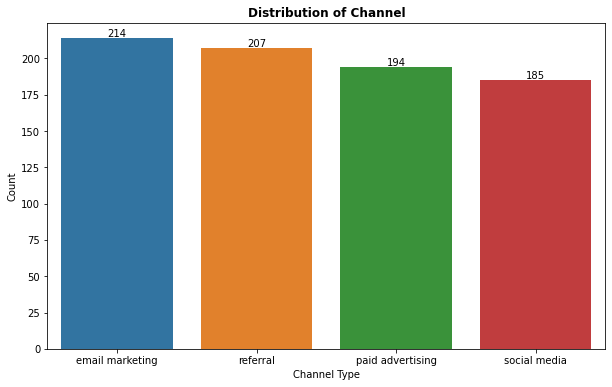

In [22]:
# Set the figure size
plt.figure(figsize=(10, 6)) 

# Create a bar plot using Seaborn
ax = sns.barplot(x = channel_counts.index , y = channel_counts.values)

for bars in ax.containers:
     ax.bar_label(bars)
# Set labels and title
plt.xlabel("Channel Type")
plt.ylabel("Count")
plt.title("Distribution of Channel", fontweight = 'bold')

plt.show()

In [ ]:
Conclusion :
    The highest distribution is observed in Email marketing.

In [19]:
cost_count = df['cost'].value_counts()
cost_count

5.246263     214
8.320327     207
30.450327    194
9.546326     185
Name: cost, dtype: int64

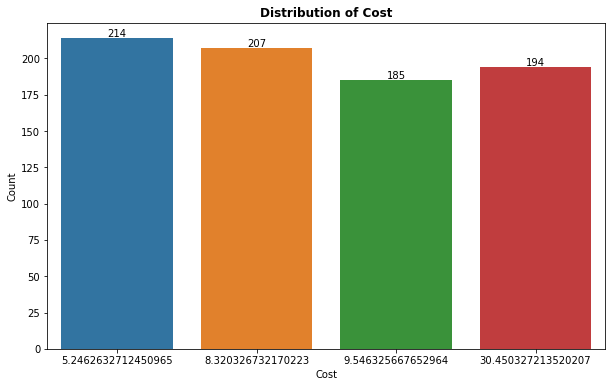

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6)) 

# Create a bar plot using Seaborn
ax = sns.barplot(x = cost_count.index, y = cost_count.values)


for bars in ax.containers:
    ax.bar_label(bars)

# Set labels and title
plt.xlabel("Cost")
plt.ylabel("Count")
plt.title("Distribution of Cost", fontweight = 'bold')

plt.show()

In [ ]:
#Customer Acquisition Cost

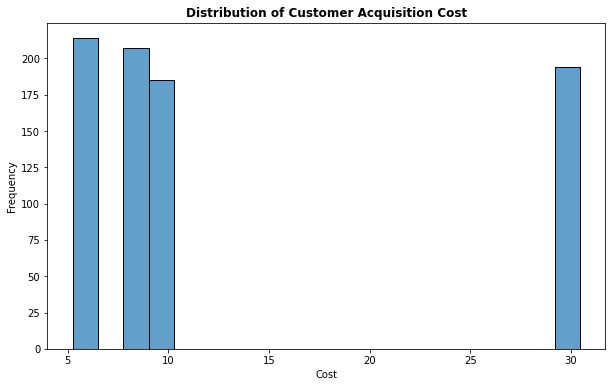

In [23]:
plt.figure(figsize=(10,6))

sns.histplot(df['cost'], bins=20, kde=False, alpha=0.7)
plt.title('Distribution of Customer Acquisition Cost', fontweight = 'bold')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Revenue Generation

In [24]:
revenue_count = df['revenue'].value_counts()
revenue_count

1303    3
2949    3
3436    3
4947    3
3326    3
       ..
3377    1
1171    1
4155    1
3175    1
2101    1
Name: revenue, Length: 722, dtype: int64

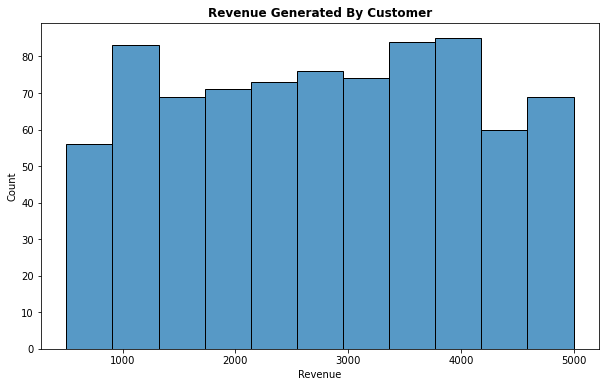

In [25]:
plt.figure(figsize=(10,6))

sns.histplot(df['revenue'])
plt.title('Revenue Generated By Customer', fontweight = 'bold')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [ ]:
Conclusion :
    The peak revenue is attained within the range of 3000 to 4000.

In [26]:
#Cost of Aquisition by Channel

In [27]:
cost_channel = df.groupby('channel')['cost'].mean()
cost_channel

channel
email marketing      5.246263
paid advertising    30.450327
referral             8.320327
social media         9.546326
Name: cost, dtype: float64

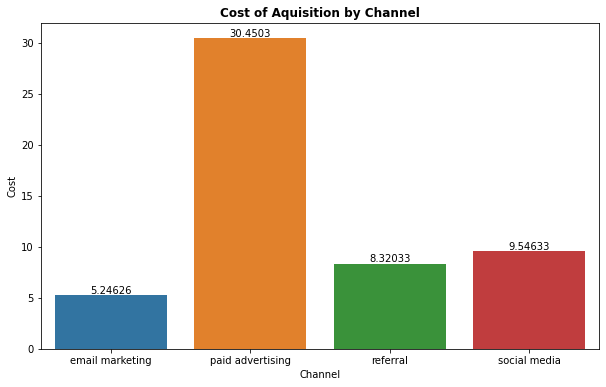

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

ax = sns.barplot(x = cost_channel.index, y = cost_channel.values)

for bars in ax.containers:
    ax.bar_label(bars)
    
# Set labels and title
plt.xlabel("Channel")
plt.ylabel("Cost")
plt.title("Cost of Aquisition by Channel", fontweight = 'bold')

plt.show()  

In [ ]:
Conclusion :
    Acquisition through paid advertising incurs the highest potential cost.

In [30]:
#Revenue Generated By Channels

In [31]:
channnel_revenue = df.groupby('channel')['revenue'].sum()
channnel_revenue

channel
email marketing     604706
paid advertising    548396
referral            569552
social media        492667
Name: revenue, dtype: int64

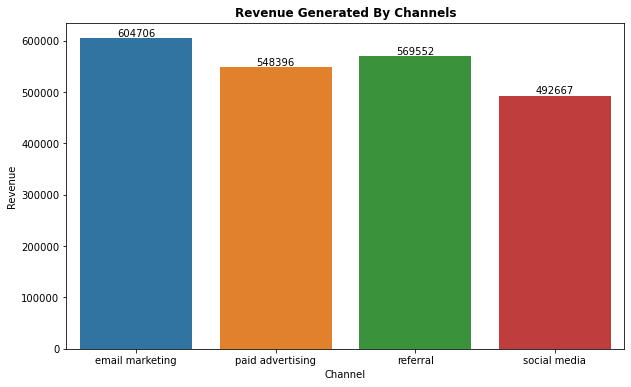

In [32]:
# Set the figure size
plt.figure(figsize=(10, 6))

ax = sns.barplot(x = channnel_revenue.index, y = channnel_revenue.values)

for bars in ax.containers:
    ax.bar_label(bars)
    
# Set labels and title
plt.xlabel("Channel")
plt.ylabel("Revenue")
plt.title("Revenue Generated By Channels", fontweight = 'bold')

plt.show()  

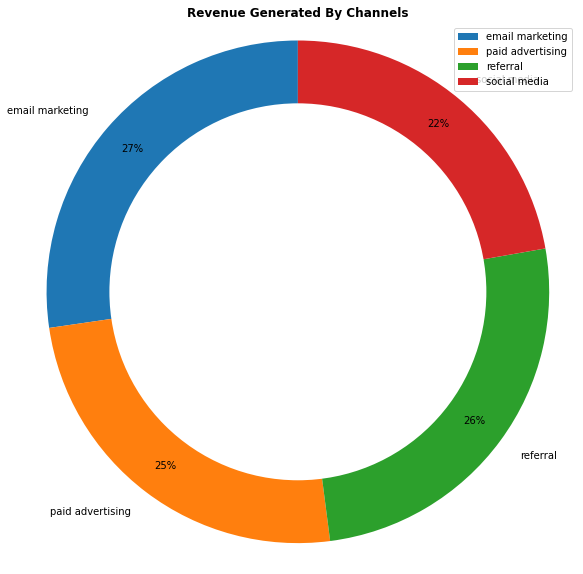

In [37]:
labels = channnel_revenue.index
counts = channnel_revenue.values



fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the width and height as needed

# Create a simple pie chart
ax.pie(counts, labels=labels, autopct="%0.0f%%", startangle=90, pctdistance=0.87)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')

# Add a legend
ax.legend(labels, loc="upper right")

# Add a title
plt.title("Revenue Generated By Channels", fontweight = 'bold')

# Hole - a white-colored circle of radius 0.75
hole = plt.Circle((0, 0), 0.75, facecolor='white')

plt.gcf().gca().add_artist(hole)

# Display the plot
plt.show()

In [ ]:
Conclusion :
    Email marketing stands as the unrivaled champion in generating maximum revenue.

In [38]:
#Customer Conversion_Rate By Cahnnel

In [39]:
conversion = df.groupby('channel')['conversion_rate'].mean()
conversion

channel
email marketing     0.043822
paid advertising    0.016341
referral            0.123145
social media        0.167592
Name: conversion_rate, dtype: float64

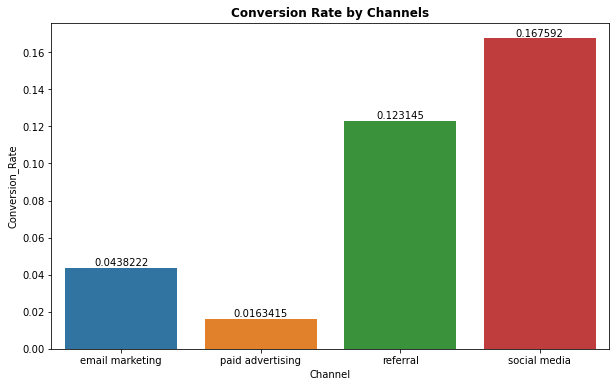

In [40]:
# Set the figure size
plt.figure(figsize=(10, 6))

ax = sns.barplot(x = conversion.index, y = conversion.values)

for bars in ax.containers:
    ax.bar_label(bars)
    
# Set labels and title
plt.xlabel("Channel")
plt.ylabel("Conversion_Rate")
plt.title("Conversion Rate by Channels", fontweight = 'bold')

plt.show()

In [ ]:
Conclusion : 
    The channel that exhibits the highest customer conversion rate is social media.

In [41]:
#Return of Investment by Channels:

In [43]:
#Return of Investment (ROI)

roi = df['revenue']/df['cost']
roi

0      504.667681
1      111.985660
2      603.095925
3      159.223564
4      290.733775
          ...    
795    294.668347
796    655.514186
797    220.084677
798     26.699220
799    918.749165
Length: 800, dtype: float64

In [44]:
roi_by_channel = df.groupby('channel')['roi'].mean()
roi_by_channel

channel
email marketing     538.617455
paid advertising     92.832615
referral            330.691213
social media        278.962290
Name: roi, dtype: float64

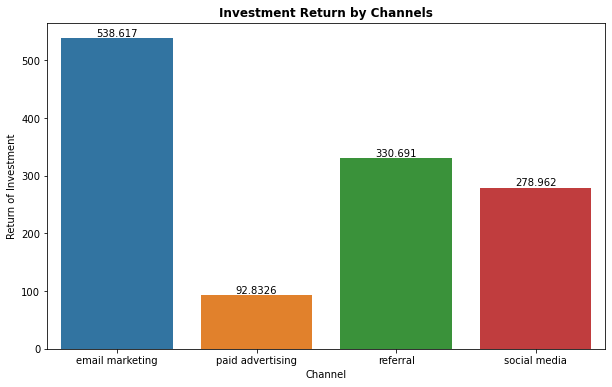

In [46]:
# Set the figure size
plt.figure(figsize=(10, 6))

ax = sns.barplot(x = roi_by_channel.index, y = roi_by_channel.values)

for bars in ax.containers:
    ax.bar_label(bars)
    
# Set labels and title
plt.xlabel("Channel")
plt.ylabel("Return of Investment")
plt.title("Investment Return by Channels", fontweight = 'bold')

plt.show()